In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/data.csv")

In [ ]:

data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
data.shape

(205052, 6)

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['text']=data['Review']+' '+data['Summary']

In [ ]:
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
data['text'] = data['text'].astype(str)
data['preprocessed_text'] = data['text'].apply(preprocess)

In [ ]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatizer.lemmatize(token, pos='v'))  # Use lemmatization here
    return result

data['text'] = data['text'].astype(str)
data['preprocessed_text'] = data['text'].apply(lemmatize)

In [ ]:
data.dtypes

product_name         object
product_price        object
Rate                 object
Review               object
Summary              object
Sentiment            object
text                 object
preprocessed_text    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(data['Sentiment'])

In [ ]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment,text,preprocessed_text
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,super! great cooler excellent air flow and for...,"[super, great, cooler, excellent, flow, price,..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,awesome best budget 2 fit cooler nice cooling,"[awesome, best, budget, cooler, nice, cool]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,fair the quality is good but the power of air ...,"[fair, quality, good, power, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,useless product very bad product its a only a fan,"[useless, product, product]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,fair ok ok product,"[fair, product]"
...,...,...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,must buy! good product,"[good, product]"
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,super! nice,"[super, nice]"
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,nice very nice and fast delivery,"[nice, nice, fast, delivery]"
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,just wow! awesome product,"[awesome, product]"


In [ ]:
unique_ratings = data['Rate'].unique()
print(unique_ratings)
valid_ratings = ['1', '2', '3', '4', '5']  # List of valid rating values
data = data[data['Rate'].isin(valid_ratings)]
unique_ratings = data['Rate'].unique()
print(unique_ratings)

['5' '3' '1' '4' '2'
 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)'
 'Bajaj DX 2 L/W Dry Iron'
 'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)']
['5' '3' '1' '4' '2']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X,tokenizer

In [ ]:
X,tokenizer=tokenize_pad_sequences(data['preprocessed_text'])
Y = pd.get_dummies(data['Sentiment'])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=33)

In [ ]:
Y

,negative,neutral,positive
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
205047,0,0,1
205048,0,0,1
205049,0,0,1
205050,0,0,1


In [ ]:
Y_train.shape

(153786, 3)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional,Dropout

# Example vocabulary size, embedding dimension, and input length
vocab_size = 10000
embedding_dim = 100
input_length = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

model.add((LSTM(88,return_sequences=True)))
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

# Compile and train the model
model.compile(optimizer="adamax",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 lstm_3 (LSTM)               (None, 50, 88)            66528     
                                                                 
 dropout_2 (Dropout)         (None, 50, 88)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              222208    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                      

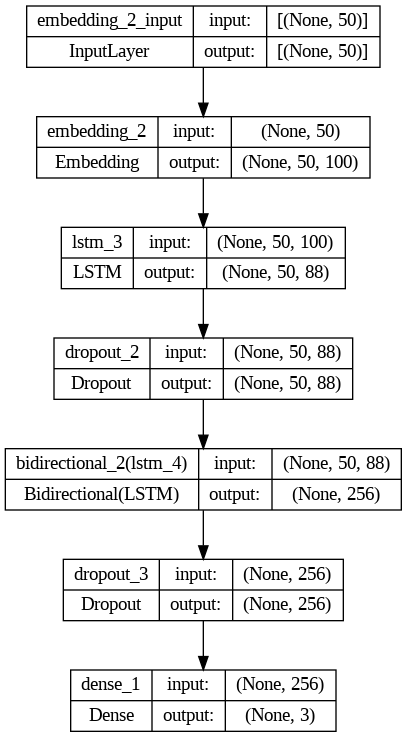

In [ ]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=15, batch_size=250)

Epoch 1/15
554/554 [==============================] - 69s 101ms/step - loss: 0.3736 - accuracy: 0.8823 - val_loss: 0.3213 - val_accuracy: 0.8980
Epoch 2/15
554/554 [==============================] - 19s 34ms/step - loss: 0.3118 - accuracy: 0.9002 - val_loss: 0.3128 - val_accuracy: 0.8992
Epoch 3/15
554/554 [==============================] - 16s 28ms/step - loss: 0.2983 - accuracy: 0.9033 - val_loss: 0.2983 - val_accuracy: 0.9018
Epoch 4/15
554/554 [==============================] - 14s 26ms/step - loss: 0.2862 - accuracy: 0.9063 - val_loss: 0.2933 - val_accuracy: 0.9045
Epoch 5/15
554/554 [==============================] - 12s 22ms/step - loss: 0.2791 - accuracy: 0.9086 - val_loss: 0.2907 - val_accuracy: 0.9032
Epoch 6/15
554/554 [==============================] - 13s 23ms/step - loss: 0.2743 - accuracy: 0.9092 - val_loss: 0.2914 - val_accuracy: 0.9034
Epoch 7/15
554/554 [==============================] - 13s 23ms/step - loss: 0.2703 - accuracy: 0.9110 - val_loss: 0.2896 - val_accuracy

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)

1602/1602 [==============================] - 11s 7ms/step - loss: 0.2939 - accuracy: 0.9037


In [ ]:
import numpy as np
num_classes = len(np.unique(Y_train))

In [ ]:
vocab_size = 10000
embedding_dim = 100
input_length = 50

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model1.add(Bidirectional(LSTM(64,return_sequences=True)))
model1.add(Dropout(0.3))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(3, activation='softmax'))

optimizer=tensorflow.keras.optimizers.Adadelta()
# Compile and train the model
model1.compile(optimizer="adamax",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model1.fit(X_train,Y_train,validation_split=0.15,epochs=15,batch_size=300)

Epoch 1/15
436/436 [==============================] - 57s 112ms/step - loss: 0.3803 - accuracy: 0.8801 - val_loss: 0.3185 - val_accuracy: 0.8995
Epoch 2/15
436/436 [==============================] - 16s 38ms/step - loss: 0.3113 - accuracy: 0.8999 - val_loss: 0.3096 - val_accuracy: 0.9014
Epoch 3/15
436/436 [==============================] - 14s 32ms/step - loss: 0.2947 - accuracy: 0.9041 - val_loss: 0.2941 - val_accuracy: 0.9046
Epoch 4/15
436/436 [==============================] - 13s 30ms/step - loss: 0.2829 - accuracy: 0.9073 - val_loss: 0.2895 - val_accuracy: 0.9071
Epoch 5/15
436/436 [==============================] - 12s 27ms/step - loss: 0.2749 - accuracy: 0.9092 - val_loss: 0.2848 - val_accuracy: 0.9069
Epoch 6/15
436/436 [==============================] - 12s 28ms/step - loss: 0.2694 - accuracy: 0.9102 - val_loss: 0.2882 - val_accuracy: 0.9061
Epoch 7/15
436/436 [==============================] - 13s 29ms/step - loss: 0.2644 - accuracy: 0.9121 - val_loss: 0.2862 - val_accuracy

In [ ]:
model1.evaluate(X_test,Y_test,batch_size=300)

171/171 [==============================] - 2s 14ms/step - loss: 0.2962 - accuracy: 0.9043


[0.29623478651046753, 0.9042974710464478]

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model2.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Bidirectional(LSTM(128, return_sequences=True)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(80, activation='relu'))
model2.add(Dense(3, activation='softmax'))

optimizer = tensorflow.keras.optimizers.Adadelta()
# Compile and train the model
model2.compile(optimizer="adamax", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model2.fit(X_train,Y_train,validation_split=0.1,epochs=15,batch_size=500)

Epoch 1/15
277/277 [==============================] - 50s 142ms/step - loss: 0.4254 - accuracy: 0.8560 - val_loss: 0.3163 - val_accuracy: 0.8991
Epoch 2/15
277/277 [==============================] - 15s 55ms/step - loss: 0.3010 - accuracy: 0.9017 - val_loss: 0.3040 - val_accuracy: 0.9014
Epoch 3/15
277/277 [==============================] - 7s 26ms/step - loss: 0.2865 - accuracy: 0.9050 - val_loss: 0.2968 - val_accuracy: 0.9038
Epoch 4/15
277/277 [==============================] - 7s 25ms/step - loss: 0.2733 - accuracy: 0.9098 - val_loss: 0.2896 - val_accuracy: 0.9055
Epoch 5/15
277/277 [==============================] - 6s 23ms/step - loss: 0.2603 - accuracy: 0.9140 - val_loss: 0.2888 - val_accuracy: 0.9079
Epoch 6/15
277/277 [==============================] - 6s 23ms/step - loss: 0.2495 - accuracy: 0.9173 - val_loss: 0.2907 - val_accuracy: 0.9067
Epoch 7/15
277/277 [==============================] - 5s 19ms/step - loss: 0.2380 - accuracy: 0.9208 - val_loss: 0.3056 - val_accuracy: 0.9

In [ ]:
model2.evaluate(X_test,Y_test,batch_size=300)

171/171 [==============================] - 1s 6ms/step - loss: 0.3561 - accuracy: 0.8967


[0.35612952709198, 0.8967286348342896]

In [ ]:
input_text="very very bad product plase stop diasappoiting me"
preprocessed_input = lemmatize(input_text)  # Preprocess the input text
tokenized_input = tokenizer.texts_to_sequences([preprocessed_input])  # Convert to tokenized sequence
padded_input = pad_sequences(tokenized_input, padding='post', maxlen=max_len)  # Pad the sequence

# Make predictions
predictions = model2.predict(padded_input)

# The predictions will be a probability distribution over classes
print(predictions)

1/1 [==============================] - 0s 23ms/step
[[0.9740312  0.01961037 0.00635839]]
